<a href="https://colab.research.google.com/github/AndreuUtkin/ML_notebooks/blob/main/DataMining4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/shivam2503/diamonds")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: boy_next_door_2077
Your Kaggle Key:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv("diamonds/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


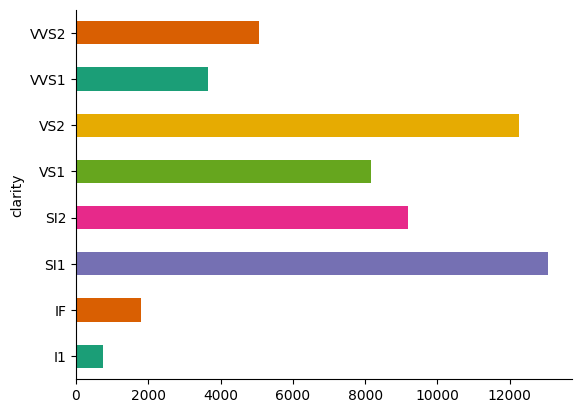

In [ ]:
# @title clarity

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('clarity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

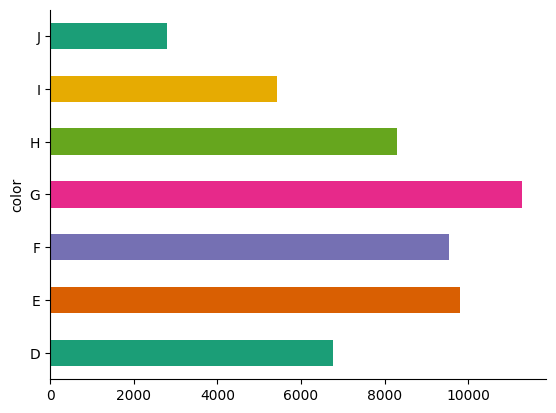

In [ ]:
# @title color

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

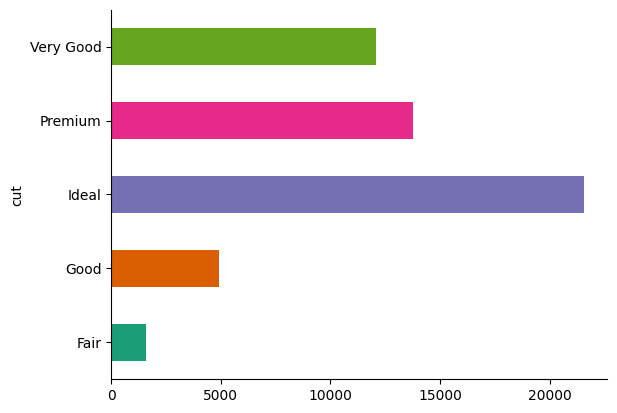

In [ ]:
# @title cut

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('cut').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_dummies = pd.get_dummies(df, dtype=float)
df_dummies

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X= df_dummies.drop(["price"],axis =1)
y= df_dummies["price"]
X= X.values
y= y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [ ]:
from keras import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))#model.add(Dropout(0.5))
model.add(Dense(1))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,681 (280.00 KB)

 Trainable params: 71,681 (280.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history =model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split = 0.2, verbose=2)



Epoch 1/40
1012/1012 - 10s - 10ms/step - loss: 17058932.0000 - mae: 2879.1992 - val_loss: 7464282.5000 - val_mae: 1856.5270
Epoch 2/40
1012/1012 - 11s - 11ms/step - loss: 6723430.0000 - mae: 1421.2877 - val_loss: 11589824.0000 - val_mae: 2295.9602
Epoch 3/40
1012/1012 - 6s - 6ms/step - loss: 5307595.0000 - mae: 1204.9872 - val_loss: 4537580.0000 - val_mae: 1069.2661
Epoch 4/40
1012/1012 - 3s - 3ms/step - loss: 4711590.0000 - mae: 1029.5052 - val_loss: 3195271.0000 - val_mae: 766.3929
Epoch 5/40
1012/1012 - 6s - 6ms/step - loss: 3780977.2500 - mae: 904.3498 - val_loss: 3338068.5000 - val_mae: 902.2894
Epoch 6/40
1012/1012 - 4s - 4ms/step - loss: 4409339.0000 - mae: 994.0621 - val_loss: 4823244.5000 - val_mae: 1051.4563
Epoch 7/40
1012/1012 - 6s - 5ms/step - loss: 3412731.2500 - mae: 853.2946 - val_loss: 4533104.0000 - val_mae: 906.0738
Epoch 8/40
1012/1012 - 4s - 4ms/step - loss: 3096333.5000 - mae: 793.3224 - val_loss: 2110190.0000 - val_mae: 559.2873
Epoch 9/40
1012/1012 - 3s - 3ms/st

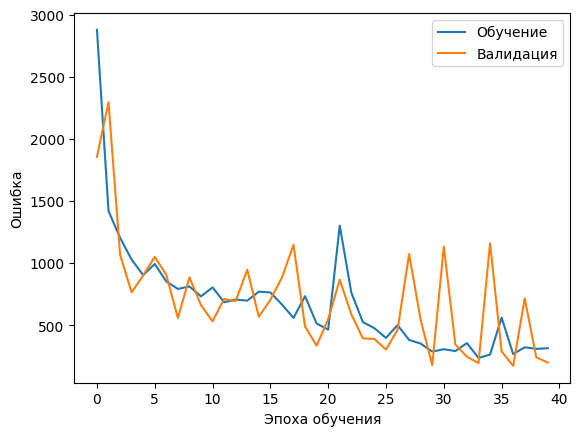

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label = 'Обучение')
plt.plot(history.history['val_mae'], label = 'Валидация')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("Предсказанное время:", pred[12], ", истинное время:", y_test[12])

Предсказанное время: [2111.2004] , истинное время: 2347


In [ ]:
#y_test = y_test.reset_index(drop=True)
diff = np.array([])

for i in np.arange(0, len(y_test)):
    diff = np.append(diff, np.abs(pred[i][0] - y_test[i]))

In [ ]:
np.sort(diff)[-15:-1]

array([ 2696.5769043 ,  2768.73388672,  2819.73120117,  2822.41821289,
        2912.03344727,  3003.86108398,  3079.79418945,  3101.46899414,
        3253.40039062,  3509.921875  ,  4532.67675781,  4607.2734375 ,
        4774.80371094, 12931.46322632])

In [ ]:
coef = 0
for i in np.arange(0, len(y_test)):
  coef += abs(y_test[i] - diff[i])/y_test[i]

coef /= len(y_test)

print(coef)

0.942612868082457
